Instead of parsing TSV manually using Python, we can just take advantage of pandas! Let's go ahead and import it!

In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
df=pd.read_excel('/content/Restaurent_Reviews.xlsx')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.describe()

,Liked
count,2262.000000
mean,0.498674
std,0.500109
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df['length'] = df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


### Data Visualization
Let's visualize this! Let's do the imports:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

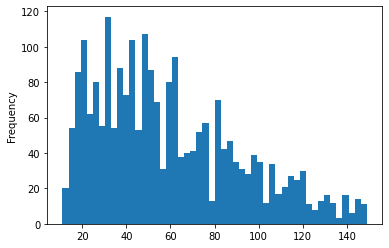

In [ ]:
df['length'].plot(bins=50, kind='hist') 

Play around with the bin size! Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 1000ish, this must mean that there is some really long message!

In [ ]:
df.length.describe()

count    2262.000000
mean       59.341733
std        32.506991
min        11.000000
25%        33.000000
50%        52.000000
75%        81.000000
max       149.000000
Name: length, dtype: float64

Looks like we have some sort of Romeo sending texts! But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f903210b990>,
      dtype=object)

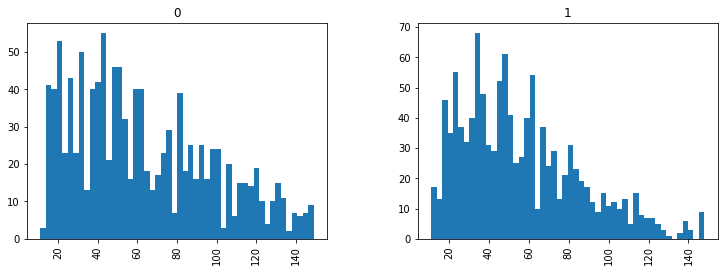

In [ ]:
df.hist(column='length', by='Liked', bins=50,figsize=(12,4))

In [ ]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [ ]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
# Check to make sure its working
df['Review'].head(5).apply(text_process)

0                                  [Wow, Loved, place]
1                                        [Crust, good]
2                              [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

In [ ]:
# Show original dataframe
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Review'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

2159


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [ ]:
df4 = df['Review'][3]
print(df4)

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.


In [ ]:
bow4 = bow_transformer.transform([df4])
print(bow4)
print(bow4.shape)

  (0, 265)	1
  (0, 342)	1
  (0, 380)	1
  (0, 381)	1
  (0, 541)	1
  (0, 1162)	1
  (0, 1255)	1
  (0, 1305)	1
  (0, 1651)	1
(1, 2159)


In [ ]:
print(bow_transformer.get_feature_names()[500])
print(bow_transformer.get_feature_names()[957])

arepas
exquisite


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_bow = bow_transformer.transform(df['Review'])

In [ ]:
print('Shape of Sparse Matrix: ', df_bow.shape)
print('Amount of Non-Zero occurences: ', df_bow.nnz)

Shape of Sparse Matrix:  (2262, 2159)
Amount of Non-Zero occurences:  12909


In [ ]:
sparsity = (100.0 * df_bow.nnz / (df_bow.shape[0] * df_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(df_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 1651)	0.29327524089382334
  (0, 1305)	0.271847503909168
  (0, 1255)	0.3365638360043933
  (0, 1162)	0.354458912892101
  (0, 541)	0.354458912892101
  (0, 381)	0.3140187054106528
  (0, 380)	0.354458912892101
  (0, 342)	0.354458912892101
  (0, 265)	0.354458912892101


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['not']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Crust']])

KeyError: ignored

To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [ ]:
df_tfidf = tfidf_transformer.transform(df_bow)
print(df_tfidf.shape)

(2262, 2159)


## Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(df_tfidf, df['Liked'])

In [ ]:
print('predicted:', nb.predict(tfidf4)[0])
print('expected:', df.Liked[1])

predicted: 1
expected: 0


In [ ]:
all_predictions = nb.predict(df_tfidf)
print(all_predictions)

[1 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print (classification_report(df['Liked'], all_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1134
           1       0.98      0.98      0.98      1128

    accuracy                           0.98      2262
   macro avg       0.98      0.98      0.98      2262
weighted avg       0.98      0.98      0.98      2262



In [ ]:
x=df['Review']
y=df['Liked']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)



In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9031b62c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
import pickle

In [ ]:
filename = '/content/finalized_model.sav'

In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
nb_model = pickle.load(open(filename, 'rb'))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a1=accuracy_score(predictions,y_test)

In [ ]:
a1

0.9426048565121413

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       215
           1       0.95      0.94      0.94       238

    accuracy                           0.94       453
   macro avg       0.94      0.94      0.94       453
weighted avg       0.94      0.94      0.94       453



In [ ]:
p1=nb_model.predict([['Crust is not good.']])
print(p1)
if p1<=0:
  print("Its a bad review")
else:
  print('Its a good review')

[0]
Its a bad review


In [ ]:
p1=nb_model.predict([['Wow... Loved this place.']])
print(p1)
if p1<=0:
  print("Its a bad review")
else:
  print('Its a good review')

[1]
Its a good review


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
model1.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9031b62c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a2=accuracy_score(y_test,y_pred)

In [ ]:
a2

0.9448123620309051

In [ ]:
filename = '/content/lr_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
Lr_Model = pickle.load(open(filename, 'rb'))

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       219
           1       0.95      0.94      0.95       234

    accuracy                           0.94       453
   macro avg       0.94      0.94      0.94       453
weighted avg       0.94      0.94      0.94       453



In [ ]:
p2=Lr_Model.predict([['Crust is not good.']])
print(p2)
if p2<=0:
  print("Its a bad review")
else:
  print('Its a good review')

[0]
Its a bad review


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.pipeline import Pipeline

model2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
model2.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9031b62c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a3=accuracy_score(y_test,y_pred)

In [ ]:
a3

0.9470198675496688

In [ ]:
filename = '/content/rf_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
Rf_Model = pickle.load(open(filename, 'rb'))

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       219
           1       0.95      0.94      0.95       234

    accuracy                           0.95       453
   macro avg       0.95      0.95      0.95       453
weighted avg       0.95      0.95      0.95       453



In [ ]:
p3=Rf_Model.predict([['Where are you']])
print(p3)
if p3<=0:
  print("Its a bad review")
else:
  print('Its a good review')

[0]
Its a bad review


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.pipeline import Pipeline

model3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
model3.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9031b62c20>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier())])

In [ ]:
y_pred=model3.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
a4=accuracy_score(y_test,y_pred)

In [ ]:
a4

0.9602649006622517

In [ ]:
filename = '/content/nn_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
Nn_Model = pickle.load(open(filename, 'rb'))

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       219
           1       0.96      0.96      0.96       234

    accuracy                           0.96       453
   macro avg       0.96      0.96      0.96       453
weighted avg       0.96      0.96      0.96       453



In [ ]:
p4=Nn_Model.predict([['The staff are great, the ambiance is great.']])
print(p4)
if p4<=0:
  print("Its a bad review")
else:
  print('Its a good review')

[1]
Its a good review


In [ ]:
df1=pd.DataFrame({'Algorithm':['Naive_Bayes','Logistic_Regression','Random_Forest','Neural_Network'],
                 'Accuracy':[a1,a2,a3,a4]})

In [ ]:
df1

,Algorithm,Accuracy
0,Naive_Bayes,0.942605
1,Logistic_Regression,0.944812
2,Random_Forest,0.947020
3,Neural_Network,0.960265


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Comparision of accuracy levels for various algorithms')

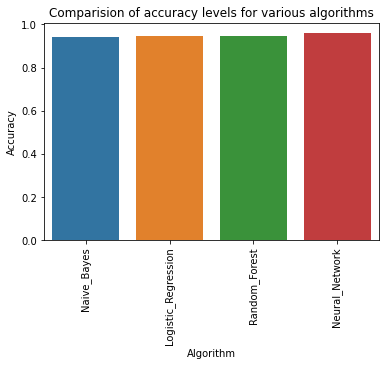

In [ ]:
sns.barplot(x='Algorithm',y='Accuracy',data=df1)
plt.xticks(rotation=90)
plt.title('Comparision of accuracy levels for various algorithms')